# Simple Data Cleaning and Exploration

Dataset was provided as part of a recruitment drive by a Tech Consulting Company.
The dataset seems to have already been partially used in some analysis as evidenced
by the 'rpart','Adjusted Prob for 50% Cut-off (without Formulae)' and 'NPS' columns.
NPS seems to have been preprocessed to 1 (for scores 9-10), 0(for scores 7-8) and 
-1(for scores 0-6). The other two columns point to Recursive Partitioning to be the 
choice of classification.

In this python file, I perform some simple data imputing on missing values in addition to 
data cleaning for later processing by Logit Regression.

# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

# Import Data

In [2]:
#Import and display Churn data

raw_data = pd.read_csv('ChurnData.csv')
raw_data

,Customer ID,Churned,Age,Average Bill over 6 months,Average Bill over 12 months,Number of defaults in last 12 bills,Payment Method,District,Area,Concesssion Card,...,rpart,Category of latest complaint,NPS,Product,Multiple Products,Product_New,Adjusted Prob for 50% Cut-off (without Formulae),Customer Segment,Product Category,Bill Amount
0,1,Yes,64.0,6.0000,123.0150,2,Credit Card,N,Northern Territory,No,...,0.357143,Network Coverage,-1,Internet Service,Yes,Mobile & Internet Service,0.838283,Independents,Internet,169
1,2,No,29.0,18.0000,26.4125,3,Cheque,S,South Australia,No,...,0.053805,Call Drop,0,Fixed Line,No,Fixed Line,0.346654,Small Business,ADSL,137
2,3,No,47.0,4.0000,108.9525,0,Cheque,Q,Queensland,No,...,0.030710,Data Charges,0,Mobile,No,Internet Service,0.228171,Independents,Fixed line,252
3,4,No,75.0,7.0000,106.0475,1,Cheque,S,South Australia,Yes,...,0.030710,High Billed Amount,0,Internet Service,Yes,"Internet Service,Fixed Line & PayTV",0.228171,"Friends, Fun & Fashion",Internet,175
4,5,No,66.0,35.4075,32.4475,1,Cheque,V,Victoria,No,...,0.144033,Call Drop,0,Fixed Line,No,Internet Service,0.610902,"Friends, Fun & Fashion",Internet,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18360,18361,No,88.0,36.1375,26.7650,0,Cheque,V,Victoria,Yes,...,0.030710,High Billed Amount,1,Mobile,No,Fixed Line,0.228171,Family & Self Development,Fixed line,55
18361,18362,No,72.0,39.8950,31.8450,0,Cheque,V,Victoria,No,...,0.030710,High Billed Amount,1,Mobile,Yes,Mobile & PayTV,0.228171,"Friends, Fun & Fashion",Fixed line,79
18362,18363,No,19.0,19.0000,43.6925,0,Cheque,V,Victoria,No,...,0.114994,Call Drop,1,Mobile,No,Fixed Line,0.547997,Independents,Mobile,81
18363,18364,No,32.0,28.1175,21.8450,6,Cheque,V,Victoria,No,...,0.053805,Data Charges,-1,Mobile,Yes,Mobile & Internet Service,0.346654,Small Business,Mobile,163


In [3]:
#copy the data frame to another variable on which further modifications will be done

data = raw_data.copy()

# Data Exploration and Conversion to Categorical Variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18365 entries, 0 to 18364
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Customer ID                                       18365 non-null  int64  
 1   Churned                                           18365 non-null  object 
 2   Age                                               17366 non-null  float64
 3   Average Bill over 6 months                        18365 non-null  float64
 4   Average Bill over 12 months                       18365 non-null  float64
 5   Number of defaults in last 12 bills               18365 non-null  int64  
 6   Payment Method                                    18365 non-null  object 
 7   District                                          18365 non-null  object 
 8   Area                                              18365 non-null  object 
 9   Concesssion Card 

# Column Info:

- Churned : Information on whether a customer has quit or not. (Yes/No)

- Age : Just a number

- Average Bill over 6/12 months : Spending of customers. A number

- Number of defaults in last 12 bills : Representative of timely bill payments.

- Payment Method : Preferred Payment Method. (Cheque/Credit Card/Direct Debit)

- District/Area : Location of Customer.

- Concession Card : Does customer use one? (Yes/No)

- Inbound/Outbound Calls : Number of calls (customer made)/(made to customer). 

- Relationship (months) : Time customer has been using services.

- Occupier Status : 

- Multiple Fuel :

- Bill Delivery Method : How bills were sent to customers. (Mail/Internet/Email)

- Category of Latest Complaint : Latest Recorded Complaint. (Call Drop/High Billed Amount/Internet Slowness/Data Charges/Network Coverage)        

- NPS : Pre-Cleaned/Converted to Categorical. 

- Product/Multiple Products : Type of products used/Multiple types of products being used.(Mobile, Fixed Line, Internet Service)/(Yes/No)

- Product_New: (Mobile/Fixed Line/Internet Service)       

- Customer Segment: (Independents/Family & Self Development/Friends, Fun & Fashion/Principled Professional/Small Business/Entrepreneur)               

- Product Category:

- Bill Amount:       

In [5]:
#check number of null values in each column. Since number of rows is greater than 5% of all records,
#we will not outright drop them.

data.isnull().sum()


#Since the total number of columns that would be dropped would be greater than 5% of the total,
#they won't be outright dropped with .dropna()
# Age : 999
# Relationship(months) : 816
# Occupier Status : 2
# Multiple Fuel : 2

Customer ID                                           0
Churned                                               0
Age                                                 999
Average Bill over 6 months                            0
Average Bill over 12 months                           0
Number of defaults in last 12 bills                   0
Payment Method                                        0
District                                              0
Area                                                  0
Concesssion Card                                      0
INBOUNDCALLS                                          0
OUTBOUNDCALLS                                         0
Relationship (months)                               816
Occupier Status                                       2
Multiple Fuel                                         2
Bill Delivery Method                                  0
rpart                                                 0
Category of latest complaint                    

In [6]:
## List of all columns

data.columns

Index(['Customer ID', 'Churned', 'Age', 'Average Bill over 6 months',
       'Average Bill over 12 months', 'Number of defaults in last 12 bills',
       'Payment Method', 'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],
      dtype='object')

### Churned

In [7]:
#Convert Churned to Categorical
data['Churned'] = data['Churned'].map({'Yes':1,'No':0})
data['Churned'].value_counts()

0    16556
1     1809
Name: Churned, dtype: int64

### Age

D:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

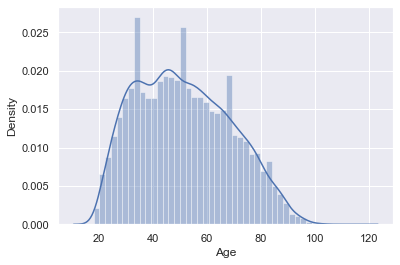

In [8]:
#Distplot to see distribution of age values.
#Distplot shows highest density of ages between the 40 to 60 mark

sns.distplot(data['Age'])

In [9]:
print(data['Age'].describe(),'\n','median = ', data['Age'].median())

count    17366.000000
mean        51.422204
std         17.456052
min         18.000000
25%         37.000000
50%         50.000000
75%         65.000000
max        116.000000
Name: Age, dtype: float64 
 median =  50.0


In [10]:
#fill missing values with median
v1 = {'Age' : 51}
data = data.fillna(value = v1)
data['Age'].describe()


count    18365.000000
mean        51.399238
std         16.974879
min         18.000000
25%         38.000000
50%         51.000000
75%         64.000000
max        116.000000
Name: Age, dtype: float64

In [11]:
#Some Consideration for Conversion to Categorical.

### Average Bill over 6 months

D:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Bill over 6 months', ylabel='Density'>

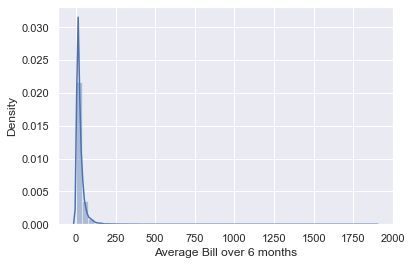

In [12]:
sns.distplot(data['Average Bill over 6 months'],norm_hist=False)

## Average Bill over 12 months
       

D:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Bill over 12 months', ylabel='Density'>

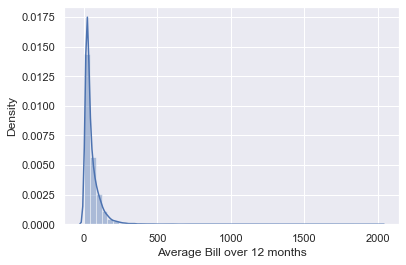

In [13]:
sns.distplot(data['Average Bill over 12 months'],norm_hist=False)

In [14]:
data[data['Average Bill over 12 months'] > 250].count()

'\n'
print('percent of data with > 250 bill =' ,236/18365)

percent of data with > 250 bill = 0.012850530901170705


In [15]:
#since only 0.013% values consist of outliers, we'll get rid of them

a = data['Average Bill over 12 months'].quantile(0.987)
data1 = data[data['Average Bill over 12 months']<a]


D:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Bill over 12 months', ylabel='Density'>

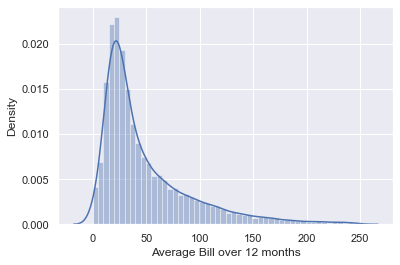

In [16]:
sns.distplot(data1['Average Bill over 12 months'])

### 'Number of defaults in last 12 bills'

In [17]:
data1['Number of defaults in last 12 bills'].value_counts()

0     6363
1     3960
2     2522
3     1710
4     1308
5      672
6      431
7      297
8      224
12     207
9      183
11     134
10     115
Name: Number of defaults in last 12 bills, dtype: int64

### Payment Method

In [18]:
data1['Payment Method'].value_counts()

Cheque          14557
Credit Card      2114
Direct Debit     1455
Name: Payment Method, dtype: int64

In [19]:
data1['Churned'].value_counts()

0    16350
1     1776
Name: Churned, dtype: int64

- Cheque        :0
- Credit Card   :1
- Direct Debit  :2

In [20]:
#Convert to Categorical
data1['Payment Method'] = data1['Payment Method'].map({'Cheque':0, 'Credit Card':1, 'Direct Debit':2})
data1['Payment Method'].value_counts()

<ipython-input-20-32931da24681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Payment Method'] = data1['Payment Method'].map({'Cheque':0, 'Credit Card':1, 'Direct Debit':2})


0    14557
1     2114
2     1455
Name: Payment Method, dtype: int64

In [21]:
#This would look better if Age was categorized as well
pd.crosstab(data1['Payment Method'],data1['Age'])

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,116.0
Payment Method,,,,,,,,,,,,,,,,,,,,,
0,2,18,46,90,120,107,162,171,184,206,...,15,8,7,2,3,2,1,3,1,1
1,0,2,2,8,12,13,14,14,27,34,...,1,1,0,0,0,0,0,0,0,0
2,1,2,6,5,6,13,11,17,14,22,...,5,1,1,1,0,0,0,0,0,0


In [22]:
data1.describe()

,Customer ID,Churned,Age,Average Bill over 6 months,Average Bill over 12 months,Number of defaults in last 12 bills,Payment Method,INBOUNDCALLS,OUTBOUNDCALLS,Relationship (months),rpart,NPS,Adjusted Prob for 50% Cut-off (without Formulae),Bill Amount
count,18126.000000,18126.000000,18126.000000,18126.000000,18126.000000,18126.000000,18126.000000,18126.000000,18126.000000,17326.000000,18126.000000,18126.000000,18126.000000,18126.000000
mean,9186.152378,0.097981,51.421935,26.198499,48.799863,1.982677,0.277171,0.131469,0.053735,44.298049,0.098874,0.350601,0.375709,215.803376
std,5299.441814,0.297297,17.038367,26.662253,42.724863,2.493164,0.600758,1.039621,0.356199,34.943724,0.160215,0.880969,0.201647,378.879019
min,1.000000,0.000000,18.000000,1.147500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,4601.250000,0.000000,38.000000,11.000000,20.185000,0.000000,0.000000,0.000000,0.000000,14.000000,0.030710,-1.000000,0.228171,87.000000
50%,9191.500000,0.000000,51.000000,18.000000,32.852500,1.000000,0.000000,0.000000,0.000000,38.000000,0.053805,1.000000,0.346654,147.000000
75%,13771.750000,0.000000,64.000000,32.061875,64.036875,3.000000,0.000000,0.000000,0.000000,67.000000,0.074102,1.000000,0.427510,244.000000
max,18365.000000,1.000000,116.000000,585.900000,248.697500,12.000000,2.000000,50.000000,9.000000,148.000000,1.000000,1.000000,1.000000,29592.000000


In [23]:
def bar_chart1(feature):
    Yes = data1[data1['Churned']==1][feature].value_counts()
    No = data1[data1['Churned']==0][feature].value_counts()
    df = pd.DataFrame([Yes,No])
    df.index = ['Churned Yes','Churned No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

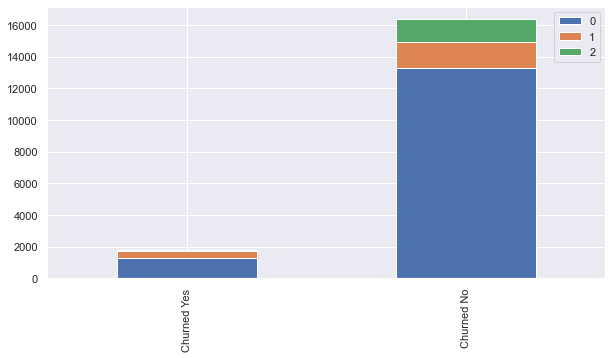

In [24]:
bar_chart1('Payment Method')

#- Cheque        :0
#- Credit Card   :1
#- Direct Debit  :2

### District

In [25]:
data1['District'].value_counts()

V    11677
Q     2784
S     2135
N     1530
Name: District, dtype: int64

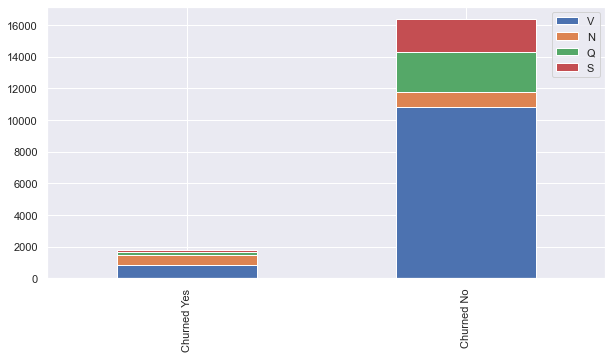

In [26]:
bar_chart1('District')

### Area

In [27]:
# Area and District seem ot be the same
data1['Area'].value_counts()

Victoria              11677
Queensland             2784
South Australia        2135
Northern Territory     1530
Name: Area, dtype: int64

### Concession Card

In [28]:
data1['Concesssion Card'].value_counts()

No     13385
Yes     4741
Name: Concesssion Card, dtype: int64

In [29]:
v3 = {'Yes':1,'No':0}
data1['Concesssion Card'] = data1['Concesssion Card'].map(v3)
data1['Concesssion Card'].describe()

<ipython-input-29-4944061e937b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Concesssion Card'] = data1['Concesssion Card'].map(v3)


count    18126.000000
mean         0.261558
std          0.439495
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Concesssion Card, dtype: float64

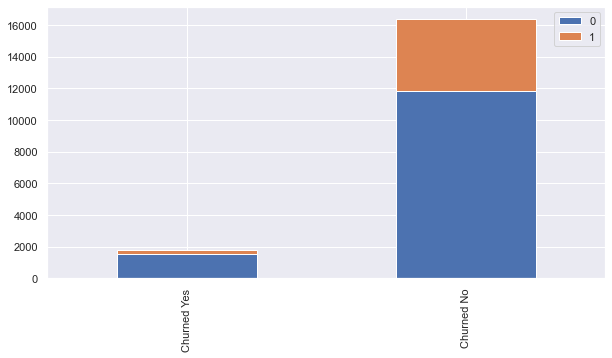

In [30]:
bar_chart1('Concesssion Card')

### Inbound Calls

In [31]:
data1['INBOUNDCALLS'].value_counts()

0     17097
1       633
2       180
3        67
4        42
5        28
6        20
7        18
8         9
10        7
9         6
11        4
50        2
14        2
15        2
24        1
30        1
22        1
26        1
12        1
19        1
28        1
44        1
32        1
Name: INBOUNDCALLS, dtype: int64

### Outbound Calls

In [32]:
data1['OUTBOUNDCALLS'].value_counts()

0    17532
1      377
2      127
3       54
4       18
5        9
6        4
9        2
7        2
8        1
Name: OUTBOUNDCALLS, dtype: int64

Unlikely that inbound/outbound calls have any significant effect on Churn chance

### Relationship (months)

In [33]:
data1['Relationship (months)'].value_counts()

5.0      391
4.0      383
1.0      346
11.0     342
2.0      339
        ... 
141.0      4
139.0      4
148.0      3
143.0      3
147.0      2
Name: Relationship (months), Length: 148, dtype: int64

D:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Relationship (months)', ylabel='Density'>

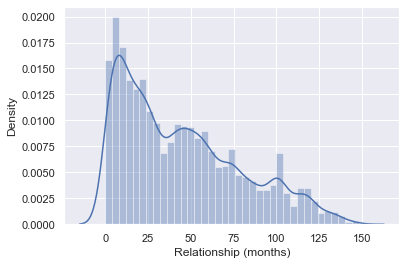

In [34]:
sns.distplot(data1['Relationship (months)'])

### Occupier Status

In [35]:
data1['Occupier Status'].value_counts()

Regular     17796
Occupier      328
Name: Occupier Status, dtype: int64

### Multiple Fuel

In [36]:
data1['Multiple Fuel'].value_counts()

N    10490
Y     7634
Name: Multiple Fuel, dtype: int64

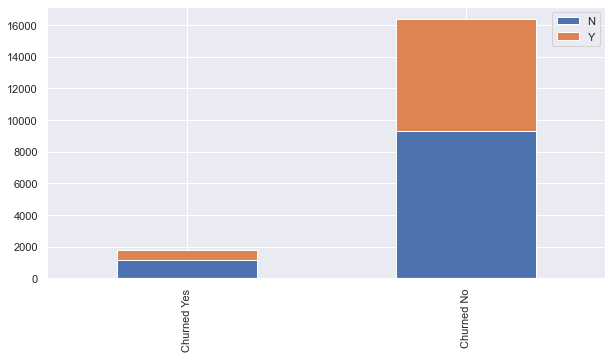

In [37]:
bar_chart1('Multiple Fuel')

### Bill Delivery Method

In [38]:
data1['Bill Delivery Method'].value_counts()

Mail        12669
Internet     5281
Email         176
Name: Bill Delivery Method, dtype: int64

### Catrgory of Latest Complaint

In [39]:
data1['Category of latest complaint'].value_counts()

Call Drop             7580
High Billed Amount    5922
Internet Slowness     4330
Data Charges           265
Network Coverage        29
Name: Category of latest complaint, dtype: int64

In [40]:
pd.crosstab(data1['Churned'],data1['Category of latest complaint'])

Category of latest complaint,Call Drop,Data Charges,High Billed Amount,Internet Slowness,Network Coverage
Churned,,,,,
0,6411,265,5345,4328,1
1,1169,0,577,2,28


Customers with Call drop issues have a disproportionately high likelihood of being churned.

In [41]:
v4 = {'Call Drop':0,'High Billed Amount':1,'Internet Slowness':2,'Data Charges':3,'Network Coverage':4}

data1['Category of latest complaint'] = data1['Category of latest complaint'].map(v4)
data1['Category of latest complaint'].value_counts()

<ipython-input-41-22679d294fe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Category of latest complaint'] = data1['Category of latest complaint'].map(v4)


0    7580
1    5922
2    4330
3     265
4      29
Name: Category of latest complaint, dtype: int64

### NPS

In [42]:
data1['NPS'].value_counts()

 1    11325
-1     4970
 0     1831
Name: NPS, dtype: int64

### Product

In [43]:
data1['Product'].value_counts()

Mobile              18119
Fixed Line              5
Internet Service        2
Name: Product, dtype: int64

### Multiple Products

In [44]:
data1['Multiple Products'].value_counts()

Yes    10963
No      7163
Name: Multiple Products, dtype: int64

In [45]:
pd.crosstab(data1['Churned'],data1['Multiple Products'])

Multiple Products,No,Yes
Churned,,
0,7163,9187
1,0,1776


In [46]:
data1['Multiple Products'] = data1['Multiple Products'].map({'Yes':1,'No':0})

<ipython-input-46-9169ad6f347c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Multiple Products'] = data1['Multiple Products'].map({'Yes':1,'No':0})


In [47]:
data1['Multiple Products'].describe()

count    18126.000000
mean         0.604822
std          0.488902
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Multiple Products, dtype: float64

Definite Link between a Customer using multiple products and getting churned.

# Product

In [48]:
data1['Product'].value_counts()

Mobile              18119
Fixed Line              5
Internet Service        2
Name: Product, dtype: int64

In [49]:
pd.crosstab(data1['Churned'],data1['Product'])

Product,Fixed Line,Internet Service,Mobile
Churned,,,
0,4,1,16345
1,1,1,1774


### Customer Segment

In [50]:
data1['Customer Segment'].value_counts()

Independents                 5652
Family & Self Development    2661
Friends, Fun & Fashion       2589
Principled Professional      2534
Small Business               2373
Entrepreneur                 2317
Name: Customer Segment, dtype: int64

In [51]:
pd.crosstab(data1['Churned'],data1['Customer Segment'])

Customer Segment,Entrepreneur,Family & Self Development,"Friends, Fun & Fashion",Independents,Principled Professional,Small Business
Churned,,,,,,
0,2317,2406,2306,4635,2313,2373
1,0,255,283,1017,221,0


Being an independent seems to make it likelier that a customer was churned

In [52]:
v4 = {'Independents':0,'Family & Self Development':1,'Friends, Fun & Fashion':2,'Principled Professional':3,'Small Business':4,'Entrepreneur':5}

data1['Customer Segment'] = data1['Customer Segment'].map(v4)

data1['Customer Segment'].value_counts()

<ipython-input-52-5392ed1e7a5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Customer Segment'] = data1['Customer Segment'].map(v4)


0    5652
1    2661
2    2589
3    2534
4    2373
5    2317
Name: Customer Segment, dtype: int64

### Product Category

In [53]:
data1['Product Category'].value_counts()

Fixed line    3481
Mobile        3274
Internet      3006
Bundle        2938
Cable         2714
ADSL          2713
Name: Product Category, dtype: int64

In [54]:
pd.crosstab(data1['Churned'],data1['Product Category'])

Product Category,ADSL,Bundle,Cable,Fixed line,Internet,Mobile
Churned,,,,,,
0,2710,2693,2714,2707,2752,2774
1,3,245,0,774,254,500


some product categories seem to be likelier to be churned than others

In [55]:
v6 = {'Fixed line':0,'Mobile':1,'Internet':2,'Bundle':3,'Cable':4,'ADSL':5}

data1['Product Category'] = data1['Product Category'].map(v6)



<ipython-input-55-111070cd863a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Product Category'] = data1['Product Category'].map(v6)


### Bill Amount

In [56]:
data1['Bill Amount'].describe()

count    18126.000000
mean       215.803376
std        378.879019
min          0.000000
25%         87.000000
50%        147.000000
75%        244.000000
max      29592.000000
Name: Bill Amount, dtype: float64

D:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bill Amount', ylabel='Density'>

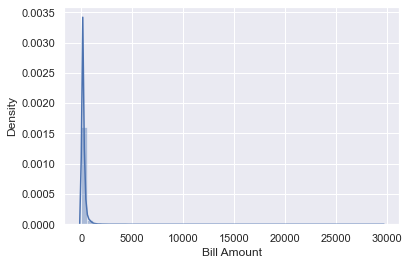

In [57]:
sns.distplot(data1['Bill Amount'])

In [58]:
x = data1[data['Bill Amount'] > 250]

x['Churned'].value_counts()

<ipython-input-58-4f09e7ff0d17>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = data1[data['Bill Amount'] > 250]


0    3906
1     413
Name: Churned, dtype: int64

approximately 10 percent of those with greater than 75percentile  bills were churned.

'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],

# Logit Regression

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#split data set into train and test set. 80-20 split.

train, test = train_test_split(data1, test_size = 0.2 )


In [62]:
train.shape

(14500, 26)

In [63]:
test.shape

(3626, 26)

### Train the Model

In [64]:
y = train['Churned']

estimators = ['Age','Concesssion Card','Category of latest complaint','Customer Segment','Product Category','NPS','Bill Amount']

x1 = train[estimators]

In [65]:
x1.shape

(14500, 7)

In [66]:
y.shape

(14500,)

In [67]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.201449
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Churned   No. Observations:                14500
Model:                          Logit   Df Residuals:                    14492
Method:                           MLE   Df Model:                            7
Date:                Fri, 05 Feb 2021   Pseudo R-squ.:                  0.3614
Time:                        03:49:51   Log-Likelihood:                -2921.0
converged:                       True   LL-Null:                       -4573.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.2785      0.125     10.255      0.000       1.034       1.523
Age                             -0.0204      0.002     -8.761      0.000      -0.025      -0.016
Concesssion Card                -0.3775      0.098     -3.866      0.000      -0.569      -0.186
Category of latest complaint    -0.9650      0.051    -18.810      0.000      -1.066      -0.864
Customer Segment                -0.5478      0.025    -21.855      0.000      -0.597      -0.499
Product Category                -0.6531      0.026    -25.144      0.000      -0.704      -0.602
NPS                             -0.9820      0.038    -26.181      0.000      -1.056      -0.908
Bill Amount                  -8.612e-06      0.000     -0.085      0.932      -0.000       0.000
================================================================================================
"""

- MLE : Maximum Likelihood Estimation. How likely is it that the model descirbes the underlying logic to the variables. Bigger is better

- Log Likelihood: Almost always negative. Bigger is better

- LLR p-value: is model statistically significant. Yes it is.

- Pseudo R-square (McFadden R-square): Good model will have values between 0.2 and 0.4. But really only used for    comparison purposes.

- Including Multiple Products as a independent variable results in a quasi-complete separation 'error' 39 percent values are 
  predicted perfectly.
  
- A complete separation in a logistic regression, sometimes also referred as perfect prediction,  happens when the outcome variable separates a predictor variable completely. Below is an example data set, where Y is the outcome variable, and X1 and X2 are predictor variables. 

- Quasi-complete separation in logistic regression happens when the outcome variable separates a predictor variable or a combination of predictor variables almost completely. 

- https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logistic-regression-and-what-are-some-strategies-to-deal-with-the-issue/

### Model Equation

log(churn/notchurn) = 1.209 -0.0183*AGE -0.4079*CONCESSION -0.8966*COMPLAINT -0.539SEGMENT -0.66*PRODUCT -0.96*NPS

- Bill Amount is statistically insignificant

In [75]:
def confusion_matrix(exog,endog,model):
        
        #Predict the values using the Logit model
        pred_values = model.predict(exog)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(endog, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, 100*accuracy

In [76]:
confusion_matrix(x,y,results)


(array([[12851.,   262.],
        [  898.,   489.]]),
 92.0)

## Predict the Model on Test Set

In [77]:
yt = test['Churned']

estimators = ['Age','Concesssion Card','Category of latest complaint','Customer Segment','Product Category','NPS','Bill Amount']

x1t = test[estimators]



In [78]:
xt = sm.add_constant(x1t)

In [79]:
confusion_matrix(xt, yt, results)

(array([[3169.,   68.],
        [ 256.,  133.]]),
 91.06453392167678)

91 percent accuracy on test data